# Customizing IPython - Extensions

Extensions are just Python modules with a special function:

```python
def load_ipython_extension(ip):
    do_anything()
```

`%load_ext module` imports the module, and calls `module.load_ipython_extension(ip)`
with the IPython instance.

This allows modules or standalone extensions to manipulate IPython.
Most often, extensions define new magics or work with the interactive namespace.

Cython is an example of a package that can be used as an IPython extension.
This defines a few magics for executing Cython code interactively.

In [1]:
%%cython

cpdef noop():
    pass

ERROR: Cell magic `%%cython` not found.


In [2]:
%load_ext Cython

In [3]:
%%cython
cimport numpy

cpdef cysum(numpy.ndarray[double] A):
    """Compute the sum of an array"""
    cdef double a=0
    for i in range(A.shape[0]):
        a += A[i]
    return a


In [4]:
def pysum(A):
    """Compute the sum of an array"""
    a = 0
    for i in range(A.shape[0]):
        a += A[i]
    return a


In [5]:
import numpy as np

In [6]:
for sz in (100, 1000, 10000):
    A = np.random.random(sz)
    print("Python %i" % sz, end=' ')
    %timeit pysum(A)
    print("np.sum %i" % sz, end=' ')
    %timeit A.sum()
    print("Cython %i" % sz, end=' ')
    %timeit cysum(A)


Python 100 10000 loops, best of 3: 24.8 µs per loop
np.sum 100 The slowest run took 15.82 times longer than the fastest. This could mean that an intermediate result is being cached 
100000 loops, best of 3: 5.38 µs per loop
Cython 100 The slowest run took 10.16 times longer than the fastest. This could mean that an intermediate result is being cached 
1000000 loops, best of 3: 1.4 µs per loop
Python 1000 1000 loops, best of 3: 242 µs per loop
np.sum 1000 The slowest run took 9.22 times longer than the fastest. This could mean that an intermediate result is being cached 
100000 loops, best of 3: 6.81 µs per loop
Cython 1000 The slowest run took 5.86 times longer than the fastest. This could mean that an intermediate result is being cached 
100000 loops, best of 3: 2.96 µs per loop
Python 10000 100 loops, best of 3: 2.44 ms per loop
np.sum 10000 The slowest run took 5.32 times longer than the fastest. This could mean that an intermediate result is being cached 
100000 loops, best of 3: 1

Let's see what Cython's `load_ipython_extension` function looks like

In [7]:
import Cython

In [8]:
Cython.load_ipython_extension??

In [9]:
from Cython.Build.IpythonMagic import CythonMagics
CythonMagics??

## Our own extension

Loading an extension can do as much or as little as you want.

Since we have been defining our timer magics, let's create an extension to make them available in any IPython session.

In [10]:
%pycat soln/mymagics.py

`%install_ext` is a function that can take any file path or URL, and puts the target into IPYTHONDIR/extensions

In [11]:
%install_ext soln/mymagics.py

Installed mymagics.py. To use it, type:
  %load_ext mymagics


In [12]:
%load_ext mymagics

In [13]:
import time
%tic
time.sleep(0.1)
%toc

101 ms


hello


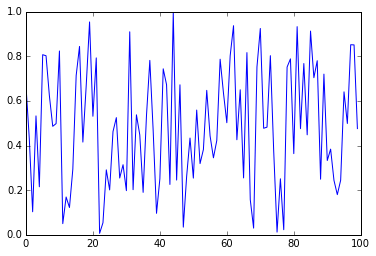

In [14]:
%nbrun _Sample

For some example extensions, see [this repository](http://github.com/minrk/ipython_extensions).

Now we can get our magics with a single `%load_ext` call.
Let's move on to [Configuring IPython](Customizing%20IPython%20-%20Config.ipynb),
so we can see how to load our extension at startup.